In [521]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sys.path.append('../../')
import Constants as c
import Utilities as utils

In [522]:

file_line = "calculate_metrics_h1_DT_combined_05_27_2020.csv"

df = pd.read_csv(file_line)

print(len(df))
# df.dropna(subset=[c.PRED_25], inplace=True)
# df.dropna(subset=[c.PRED_50], inplace=True)

# df.where(df[c.T_RECORDS] > 2, inplace = True)
# df.where(df[c.P_NA] <= .10, inplace = True)
# df.dropna()

print(len(df))

1152
1152


In [523]:
def hypothesisTest_Effort(model_records, model, task, pred, mean, sample_size):
    print("Hypothesis test for {0} and task = '{1}'".format(model, task))

    if task != "ALL":
        filter = model_records[model_records[c.TASK] == task]
        model_records = pd.concat([filter])
    
    filter1 = model_records[model_records[c.MODEL] == c.LINE]
    model_records = pd.concat([filter1]).sample(n=sample_size, random_state=0)

    num_records = len(model_records)
    model_records_mean = round(model_records[pred].mean(),2)

    print("Number of records: {0}".format(num_records))
    print("Sample mean: ", model_records_mean)
    
    alpha = 0.05
    is_gaussian = utils.gaussian_test(model_records[pred], alpha)

    if is_gaussian:
        if num_records <= 30:
            utils.one_sample_t_test(model_records[pred], mean, alpha)
        else:
            utils.one_sample_z_test(model_records[pred], mean, alpha)
    else:
        utils.one_sample_sign_test(model_records[pred], mean, alpha)

    model_records.boxplot(column=[pred])
    plt.figure(figsize=(8,3))
    plt.tight_layout()
    sb.distplot(model_records[pred], kde=False)

In [524]:
task = "DOCS"
sample_size = 64

Hypothesis test for Module and task = 'DOCS'
Number of records: 64
Sample mean:  0.75
Shapiro p-value:  0.001
Shapiro Test: Sample does not look Gaussian (reject H0)
One Sample Sign Test p-value:  1.0507232717140573e-08
One Sample Sign Test: 0.75 sample median is not likely to be greater than 0.53 (reject H0)


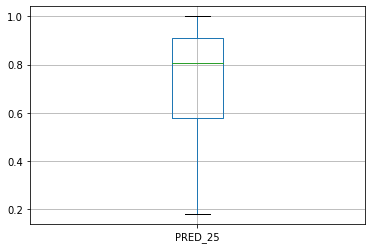

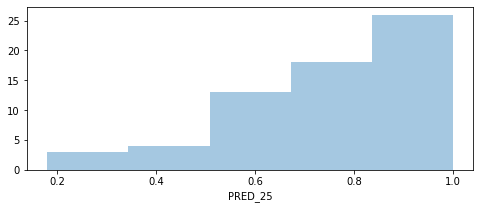

In [525]:
hypothesisTest_Effort(df.copy(), c.MODULE, task, c.PRED_25, 0.53, sample_size)

Hypothesis test for Module and task = 'DOCS'
Number of records: 64
Sample mean:  0.78
Shapiro p-value:  0.0017
Shapiro Test: Sample does not look Gaussian (reject H0)
One Sample Sign Test p-value:  0.04295654552438922
One Sample Sign Test: 0.78 sample median is not likely to be greater than 0.87 (reject H0)


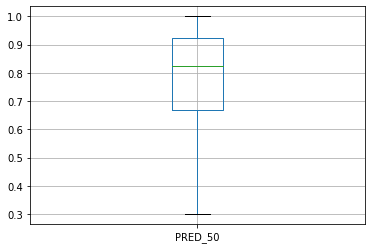

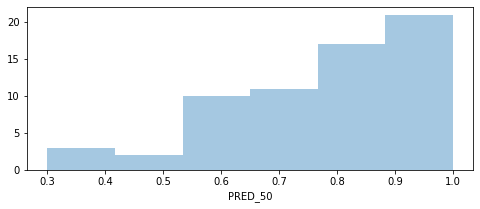

In [526]:
hypothesisTest_Effort(df.copy(), c.MODULE, task, c.PRED_50, 0.87, sample_size)

Hypothesis test for Line and task = 'DOCS'
Number of records: 64
Sample mean:  0.75
Shapiro p-value:  0.001
Shapiro Test: Sample does not look Gaussian (reject H0)
One Sample Sign Test p-value:  4.74284240353784e-15
One Sample Sign Test: 0.75 sample median is not likely to be greater than 0.33 (reject H0)


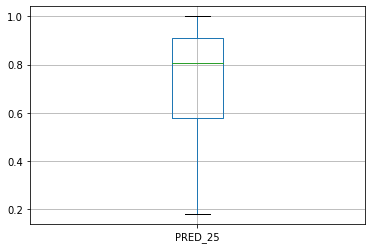

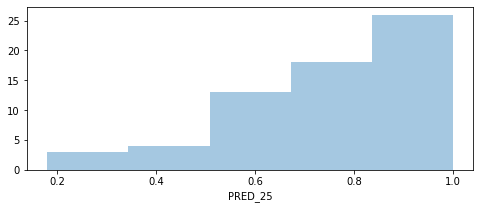

In [527]:
hypothesisTest_Effort(df.copy(), c.LINE, task, c.PRED_25, 0.33, sample_size)

Hypothesis test for Line and task = 'DOCS'
Number of records: 64
Sample mean:  0.78
Shapiro p-value:  0.0017
Shapiro Test: Sample does not look Gaussian (reject H0)
One Sample Sign Test p-value:  2.7756368641430196e-07
One Sample Sign Test: 0.78 sample median is not likely to be greater than 0.6 (reject H0)


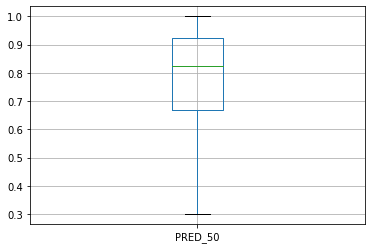

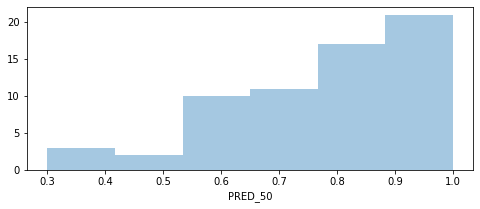

In [528]:
hypothesisTest_Effort(df.copy(), c.LINE, task, c.PRED_50, 0.60, sample_size)